# 可视化文件夹中的图像

同济子豪兄 https://space.bilibili.com/1900783

代码运行[云GPU平台](https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1)

2022-7-31

## 导入工具包

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

import numpy as np
import math
import os

import cv2

from tqdm import tqdm

## 指定要可视化图像的文件夹

In [2]:
folder_path = 'melon17_split/train/西瓜'

In [3]:
# 可视化图像的个数
N = 36

In [14]:
# n 行 n 列
n = math.floor(np.sqrt(N))
n

6

## 读取文件夹中的所有图像

In [15]:
images = []
for each_img in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, each_img)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

In [16]:
len(images)

36

## 画图

/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


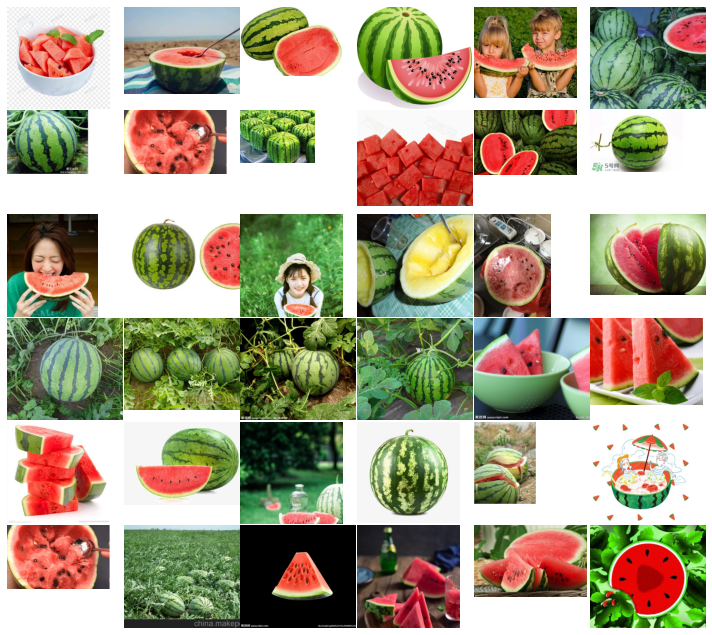

In [17]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(n, n),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                 )

# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()

## 注意事项

数据集应尽可能包括目标物体的各类场景，训练出的图像分类模型才能在各类测试场景中具备好的泛化性能，防止过拟合。

```
不同尺寸、比例的图像

不同拍摄环境（光照、设备、拍摄角度、遮挡、大小）

不同形态（完整西瓜、切瓣西瓜、切块西瓜）

不同时期（瓜秧、小瓜、大瓜）

不同背景（人物、菜地、抠图）

不同图像域（照片、漫画、剪贴画、油画）

```

如果训练集的图像分布与测试集（或真实测试场景）的图像分布不一致，会出现OOD（Out-Of-Distribution）问题。

我们工作室的小伙伴[tennant123](https://space.bilibili.com/12270504)在 ECCV 2022 举办了一场 Workshop: 计算机视觉中的OOD泛化

详细信息见 https://zhuanlan.zhihu.com/p/526185478